Multiclass Classification Problem using Artificial Neural Network on Fashion Mnist Dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()

In [20]:
xtrain.shape,ytrain.shape

((60000, 28, 28), (60000,))

In [21]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

In [22]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
class_names=['T-shirt/top','Trouser','Pullovers','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

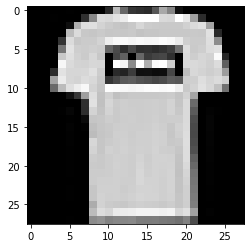

In [24]:
plt.imshow(xtrain[1],cmap='gray')

Scaling the Image Data in 0 to 1 Scale

In [25]:
xtrain=xtrain/255.0
xtest=xtest/255.0  

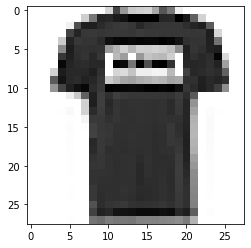

In [26]:
plt.imshow(xtrain[1],cmap=plt.cm.binary)  

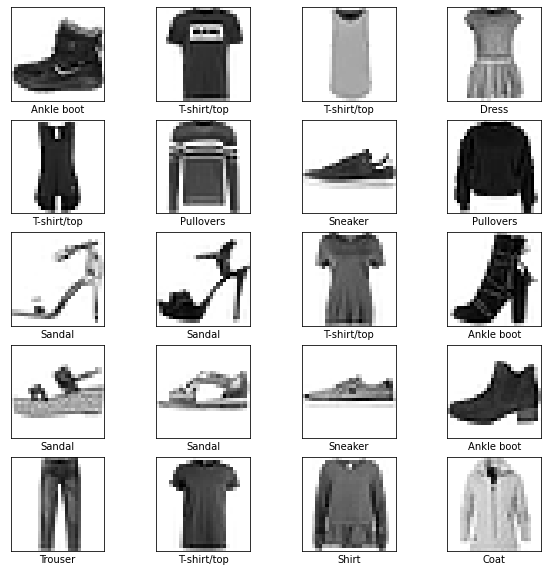

In [32]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(xtrain[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[ytrain[i]])
  plt.xticks([])
  plt.yticks([])

In [35]:
xtrain[0].flatten().shape

(784,)

In [36]:
#Generating a Neural Network for Multi Classification 
model=tf.keras.models.Sequential()
#input layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#hidden layer
model.add(tf.keras.layers.Dense(128,activation='relu'))
#output layer
model.add(tf.keras.layers.Dense(10))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(xtrain,ytrain,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5029 - accuracy: 0.8256
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3827 - accuracy: 0.8615
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3399 - accuracy: 0.8767
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3169 - accuracy: 0.8841
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8903
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8954
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.8996
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9031
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9077
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [38]:
loss,acc=model.evaluate(xtrain,ytrain)
print("Training Accuracy is {} and Training Loss is {}".format(acc,loss))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.1463 - accuracy: 0.9446
Training Accuracy is 0.944599986076355 and Training Loss is 0.14634767174720764


In [39]:
loss,acc=model.evaluate(xtest,ytest)
print("Testing Accuracy is {} and Testing Loss is {}".format(acc,loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8916
Testing Accuracy is 0.8916000127792358 and Testing Loss is 0.37168630957603455


In [40]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [41]:
ypred=probability_model.predict(xtest)

In [49]:
ypred[1]

array([5.1353732e-04, 5.0681661e-16, 9.9913198e-01, 6.5878536e-13,
       3.2972562e-04, 1.8127777e-17, 2.4717963e-05, 1.8182052e-27,
       6.3039173e-14, 1.7753765e-18], dtype=float32)

In [48]:
np.argmax(ypred[1]),ytest[1]

(2, 2)

In [50]:
class_names[np.argmax(ypred[1])]

'Pullovers'

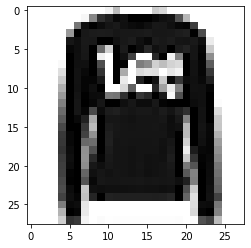

In [51]:
plt.imshow(xtest[1],cmap=plt.cm.binary)

In [56]:
#plot image with label
def plot_image(i,ypred,xtest,ytest):
  img=xtest[i]
  actual=ytest[i]
  predicted=np.argmax(ypred[i])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  if actual==predicted:
    color='g'
  else:
    color='r'
  plt.xlabel("{} with prob {:.2f}%".format(class_names[predicted],100*np.max(ypred[i])),color=color)


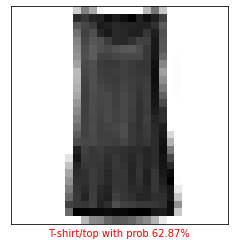

In [84]:
plot_image(7416,ypred,xtest,ytest)

In [76]:
def plot_prob(i,ypred,ytest):
  predicted=np.argmax(ypred[i])
  actual=ytest[i]
  barplot=plt.bar(range(10),ypred[i])
  plt.xticks(range(10))
  barplot[predicted].set_color('r')
  barplot[actual].set_color('g')

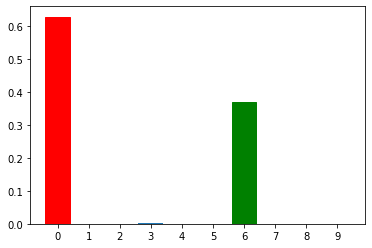

In [85]:
plot_prob(7416,ypred,ytest)

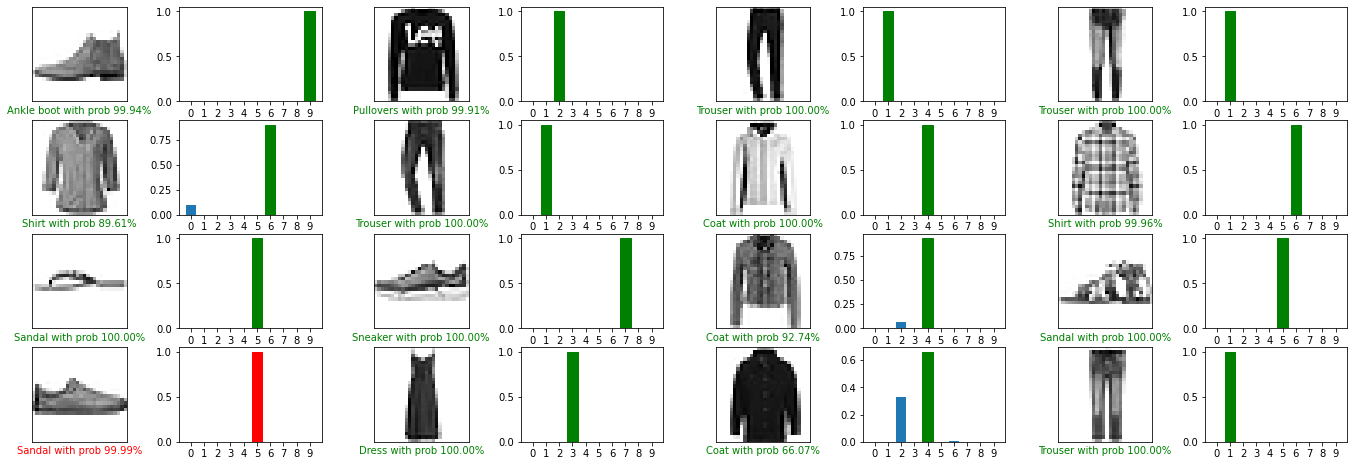

In [83]:
row=4
col=4
n=row*col
plt.figure(figsize=(6*col,2*row))
for i in range(n):
  plt.subplot(row,2*col,2*i+1)
  plot_image(i,ypred,xtest,ytest)
  plt.subplot(row,2*col,2*i+2)
  plot_prob(i,ypred,ytest)

In [88]:
np.argmax(ypred[0]) 

9

In [90]:
ypred[0][9]*100

99.94460940361023